In [3]:
df.shape


(1259, 11)

In [4]:
df.isnull().sum()


Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [5]:
df['Per_Sqft']=df['Per_Sqft'].fillna(df['Price']/df['Area'])
                                     

In [6]:
df['Parking'].fillna(df['Parking'].mode()[0],inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0],inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0],inplace=True)
df['Type'].fillna(df['Type'].mode()[0],inplace=True)



In [7]:
df.isnull().sum()


Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [8]:
df.dtypes


Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [9]:
df[['Parking','Bathroom']].astype('int64')


,Parking,Bathroom
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
1254,3,5
1255,3,2
1256,3,3
1257,1,2


In [10]:
df.nunique()



Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       433
dtype: int64

In [11]:
print(df['Area'].value_counts(),'\n',df['BHK'].value_counts(),'\n',df['Bathroom'])

900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64 
 3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64 
 0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1254    5.0
1255    2.0
1256    3.0
1257    2.0
1258    3.0
Name: Bathroom, Length: 1259, dtype: float64


In [12]:
df['Area_yards']=df['Area']/9



In [13]:
import pandas as pd
import duckdb as db
import matplotlib.pyplot as plt
import numpy
import seaborn as sns


In [14]:

def grp_local(locality):
 locality = locality.lower() 
 if 'rohini' in locality:
     return 'Rohini Sector'
 elif 'dwarka' in locality:
     return 'Dwarka Sector'
 elif 'shahdara' in locality:
     return 'Shahdara'
 elif 'vasant' in locality:
     return 'Vasant Kunj'
 elif 'paschim' in locality:
     return 'Paschim Vihar'
 elif 'alaknanda' in locality:
     return 'Alaknanda'
 elif 'vasundhar' in locality:
     return 'Vasundhara Enclave'
 elif 'punjabi' in locality:
     return 'Punjabi Bagh'
 elif 'kalkaji' in locality:
     return 'Kalkaji'
 elif 'lajpat' in locality:
     return 'Lajpat Nagar'
 else:
     return 'Other'




In [15]:
df['Locality'] = df['Locality'].apply(grp_local)

In [16]:
df['Locality'].value_counts()

Other                 716
Lajpat Nagar           90
Dwarka Sector          87
Rohini Sector          75
Shahdara               75
Alaknanda              58
Vasant Kunj            35
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Name: Locality, dtype: int64

In [17]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
df = df[(z < 3).all(axis=1)]


In [18]:
print(z)

          Area       BHK  Bathroom   Parking     Price  Per_Sqft  Area_yards
0     0.425188  0.213130  0.533227  0.147045  0.578591  0.360619    0.425188
1     0.457087  0.835038  0.533227  0.147045  0.637205  0.436523    0.457087
2     0.329490  0.835038  0.533227  0.147045  0.226904  0.436523    0.329490
3     0.552785  0.835038  0.533227  0.147045  0.668466  0.436523    0.552785
4     0.520886  0.835038  0.533227  0.147045  0.590313  0.436523    0.520886
...        ...       ...       ...       ...       ...       ...         ...
1254  1.691650  1.261298  2.348028  0.175762  1.316608  0.111199    1.691650
1255  0.265691  0.213130  0.533227  0.175762  0.344133  0.111199    0.265691
1256  0.377339  0.213130  0.427192  0.175762  0.148752  0.111199    0.377339
1257  0.303970  0.835038  0.533227  0.147045  0.383209  0.111199    0.303970
1258  6.114170  0.213130  0.427192  0.147045  0.109675  0.111199    6.114170

[1259 rows x 7 columns]


In [19]:
print(df)

        Area  BHK  Bathroom      Furnishing       Locality  Parking     Price  \
0      800.0    3       2.0  Semi-Furnished  Rohini Sector      1.0   6500000   
1      750.0    2       2.0  Semi-Furnished  Rohini Sector      1.0   5000000   
2      950.0    2       2.0       Furnished  Rohini Sector      1.0  15500000   
3      600.0    2       2.0  Semi-Furnished  Rohini Sector      1.0   4200000   
4      650.0    2       2.0  Semi-Furnished  Rohini Sector      1.0   6200000   
...      ...  ...       ...             ...            ...      ...       ...   
1253  1200.0    3       3.0  Semi-Furnished          Other      1.0  16500000   
1254  4118.0    4       5.0     Unfurnished          Other      3.0  55000000   
1255  1050.0    3       2.0  Semi-Furnished          Other      3.0  12500000   
1256   875.0    3       3.0  Semi-Furnished          Other      3.0  17500000   
1257   990.0    2       2.0     Unfurnished          Other      1.0  11500000   

             Status   Trans

In [20]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Area_yards
count,1189.000000,1189.000000,1189.000000,1189.000000,1.189000e+03,1189.000000,1189.000000
mean,1296.421567,2.735913,2.483600,1.410429,1.852459e+07,12629.785274,144.046841
std,750.284776,0.859232,0.952107,0.719913,1.772598e+07,8434.085021,83.364975
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1250.000000,3.111111
25%,800.000000,2.000000,2.000000,1.000000,5.510000e+06,6526.000000,88.888889
50%,1150.000000,3.000000,2.000000,1.000000,1.350000e+07,10943.000000,127.777778
75%,1600.000000,3.000000,3.000000,2.000000,2.490000e+07,16584.000000,177.777778
max,5220.000000,5.000000,5.000000,10.000000,9.300000e+07,72000.000000,580.000000


In [21]:
df.head(20)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_yards
0,800.0000,3,2.0,Semi-Furnished,Rohini Sector,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0,88.888889
1,750.0000,2,2.0,Semi-Furnished,Rohini Sector,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0,83.333333
2,950.0000,2,2.0,Furnished,Rohini Sector,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0,105.555556
3,600.0000,2,2.0,Semi-Furnished,Rohini Sector,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0,66.666667
4,650.0000,2,2.0,Semi-Furnished,Rohini Sector,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0,72.222222
5,1300.0000,4,3.0,Semi-Furnished,Rohini Sector,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0,144.444444
6,1350.0000,4,3.0,Semi-Furnished,Rohini Sector,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0,150.000000
7,650.0000,2,2.0,Semi-Furnished,Rohini Sector,1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0,72.222222
8,985.0000,3,3.0,Unfurnished,Rohini Sector,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0,109.444444
9,1300.0000,4,4.0,Semi-Furnished,Rohini Sector,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0,144.444444


Text(0.5, 1.0, 'Area in Yards')

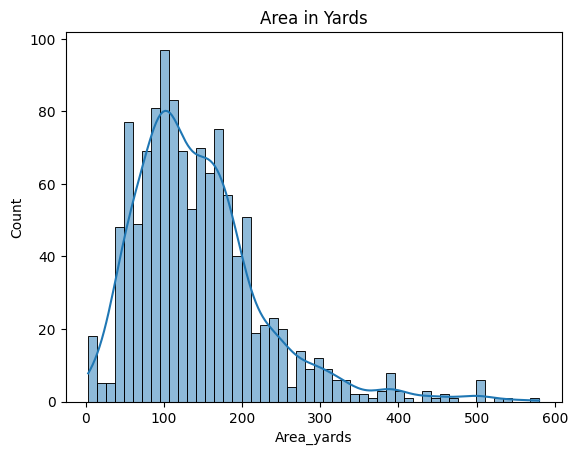

In [22]:
sns.histplot(x=df['Area_yards'], kde = True, bins = 50).set_title('Area in Yards')






Text(0.5, 1.0, 'BHK')

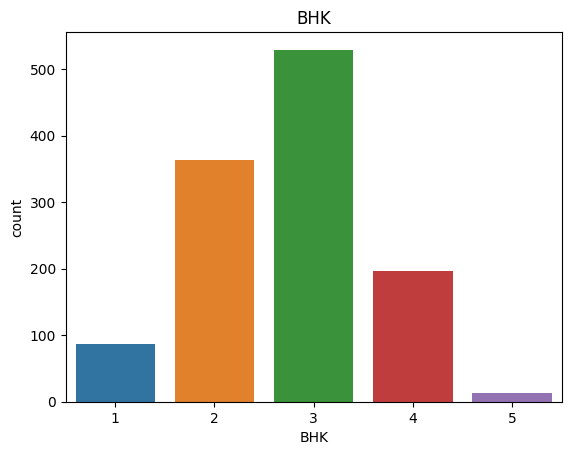

In [23]:

sns.countplot(x = 'BHK', data = df).set_title('BHK')


Text(0.5, 1.0, 'Furnishing')

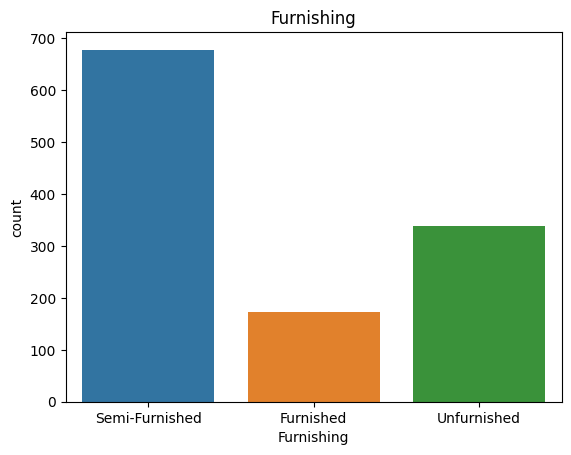

In [24]:
sns.countplot(x='Furnishing',data=df).set_title('Furnishing')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

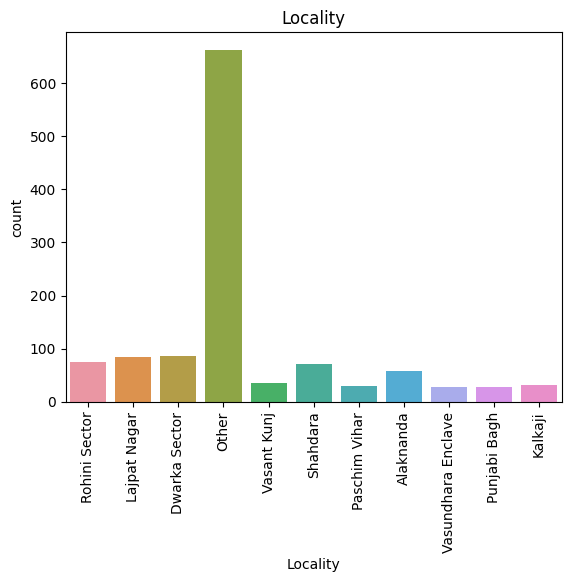

In [25]:

sns.countplot(x = 'Locality', data = df).set_title('Locality')
plt.xticks(rotation = 90)


Text(0.5, 1.0, 'Parking')

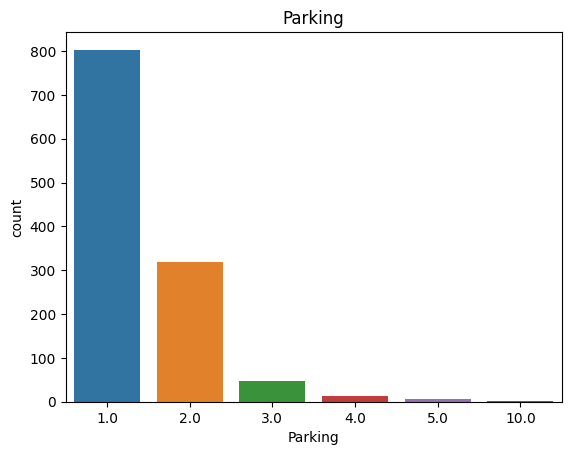

In [26]:

sns.countplot(x = 'Parking', data = df).set_title('Parking')

Text(0.5, 1.0, 'Status of the Property')

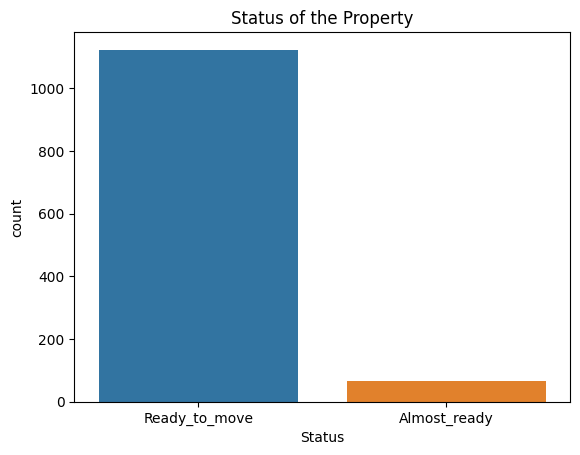

In [27]:

sns.countplot(x = 'Status', data = df).set_title('Status of the Property')

Text(0.5, 1.0, 'BHK vs Price')

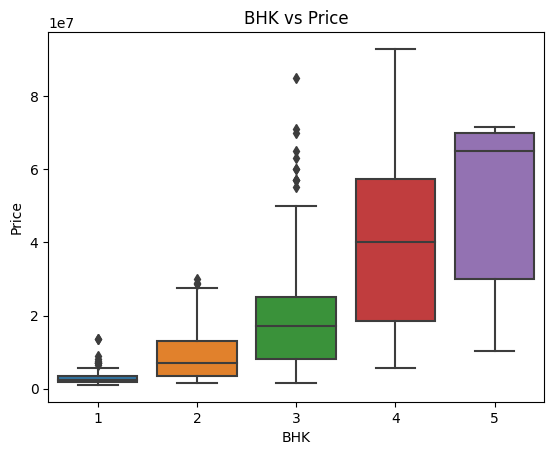

In [28]:
sns.boxplot(x = 'BHK', y = 'Price', data = df).set_title('BHK vs Price')


Text(0.5, 1.0, 'Bathroom vs Price')

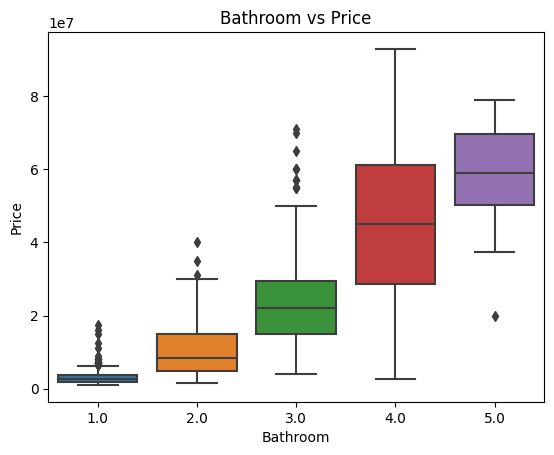

In [29]:
sns.boxplot(x = 'Bathroom', y = 'Price', data = df).set_title('Bathroom vs Price')


Text(0.5, 1.0, 'Parking vs Price')

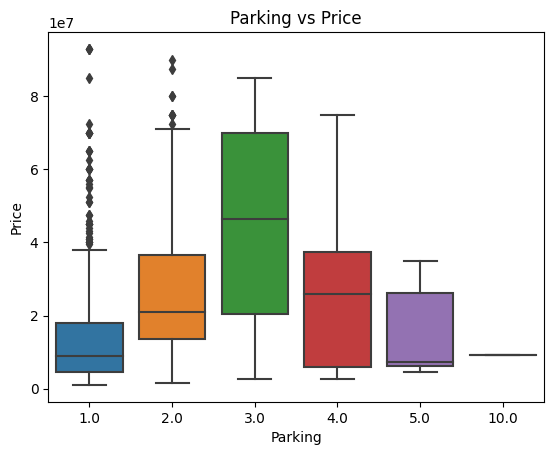

In [30]:
sns.boxplot(x = 'Parking', y = 'Price', data = df).set_title('Parking vs Price')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

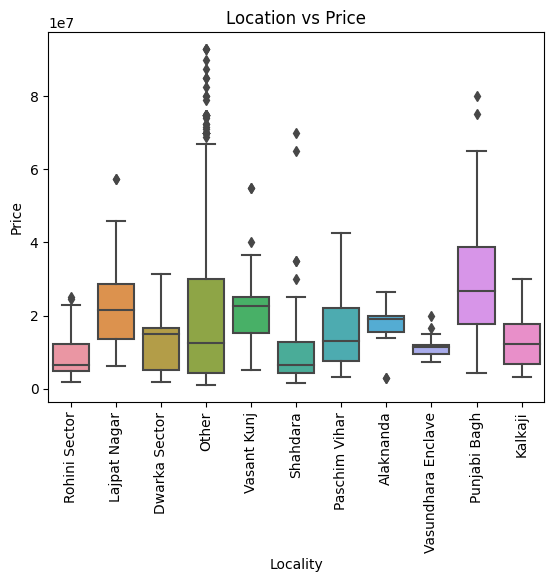

In [31]:

sns.boxplot(x='Locality', y='Price', data=df).set_title('Location vs Price')
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Price vs Status')

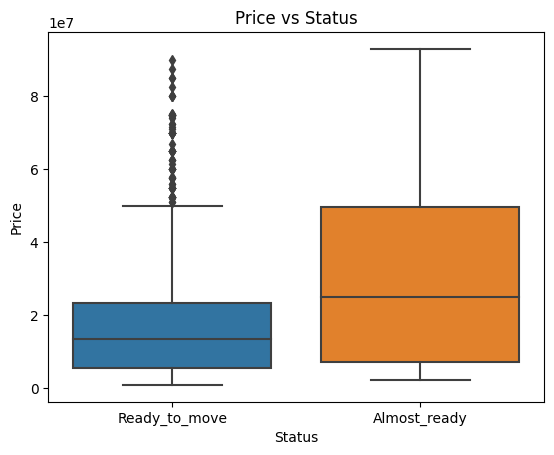

In [32]:

sns.boxplot(x = 'Status', y = 'Price', data = df).set_title('Price vs Status')

Text(0.5, 1.0, 'Price vs Type')

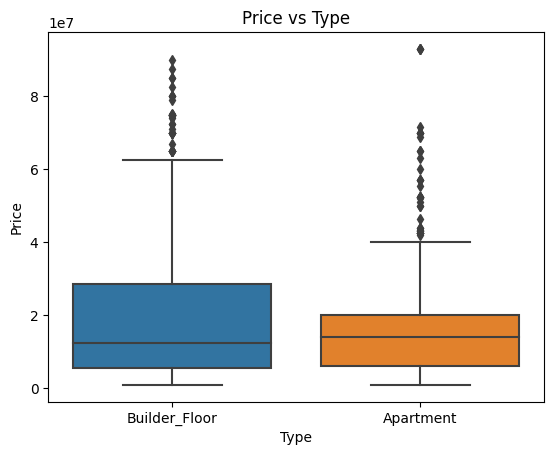

In [33]:
sns.boxplot(x = 'Type', y = 'Price', data = df).set_title('Price vs Type')


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']
for i in cols:
 le.fit(df[i])
 df[i] = le.transform(df[i])
 print(i, df[i].unique())


Furnishing [1 0 2]
Locality [ 7  3  1  4  9  8  5  0 10  6  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


<Axes: >

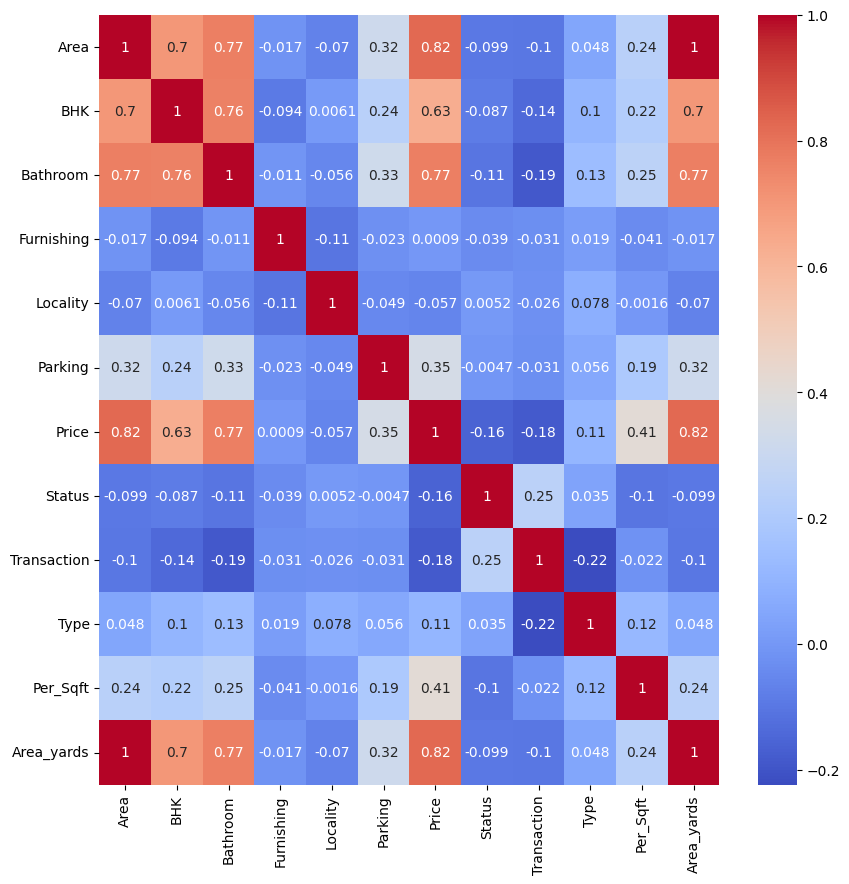

In [35]:

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')





In [1]:
import sys
import matplotlib
matplotlib.use('Agg')

import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


d = {'Semi-Furnished': 1, 'Furnished': 0,'Unfurnished':2}
df['Furnishing'] = df['Furnishing'].map(d)
features = ['Area', 'BHK' ,'Bathroom','Locality','Status', 'Parking', 'Price' ]
X = df[features]
y = df['Furnishing']


print(X)


NameError: name 'df' is not defined

In [ ]:
print(y)